<a href="https://colab.research.google.com/github/Alialqaddy/-_Loan_Prediction_w_Various_ML_Models_-.ipynb/blob/main/%F0%9F%92%B3%F0%9F%92%B2_Loan_Prediction_w_Various_ML_Models_%F0%9F%92%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Set Problems** 🤔

👉 The company seeks to automate (in real time) the loan qualifying procedure based on information given by customers while filling out an online application form. It is expected that the development of ML models that can help the company predict loan approval in accelerating decision-making process for determining whether an applicant is eligible for a loan or not.

________________________________________________________________________________________________________________________________________________________________

**Objectives of Notebook 📌**

👉 This notebook aims to:

Analyze customer data provided in data set (EDA)
Build various ML models that can predict loan approval


**👨‍💻 The machine learning models used in this project are:**


Logistic Regression

K-Nearest Neighbour (KNN)

Support Vector Machine (SVM)

Naive Bayes

Decision Tree

Random Forest

Gradient Boost

________________________________________________________________________________________________________________________________________________________________

**Data Set Description** 🧾

👉 There are 13 variables in this data set:

8 categorical variables,

4 continuous variables, and

1 variable to accommodate the loan ID.

**Importing Libraries** 📚

👉 Importing libraries that will be used in this notebook.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns
import warnings
import os
import scipy

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

**Reading Data Set** 👓

👉 After importing libraries, we will also import the dataset that will be used.

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving loan_data_set.csv to loan_data_set (2).csv


In [ ]:
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
print(df.shape)

(614, 13)


👉 As can be seen, the **13 columns** are readable. It also can be seen that there are **614 observations** in the data set.

 .

**Data Exploration** 🔍

👉 This section will perform data exploration of "raw" data set that has been imported.

.

**Categorical Variable**


👉 The first type of variable that I will explore is categorical variable.

**Loan ID**

In [ ]:
df.Loan_ID.value_counts(dropna=False)

,count
Loan_ID,
LP002990,1
LP001002,1
LP001003,1
LP001005,1
LP001006,1
...,...
LP001024,1
LP001020,1
LP001018,1


In [ ]:
df.Loan_ID.duplicated().sum()

np.int64(0)

 It can be seen that there are 614 unique ID in the dataset.

**Gender**

In [ ]:
df.Gender.value_counts(dropna=False)

,count
Gender,
Male,489
Female,112
NaN,13


<ipython-input-177-e82605aa23c5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", data=df, palette="hls")


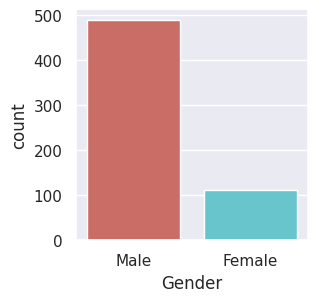

Percentage of Male applicant: 79.64%
Percentage of Female applicant: 18.24%
Missing values percentage: 2.12%


In [ ]:
plt.figure(figsize=(3,3))
sns.countplot(x="Gender", data=df, palette="hls")
plt.show()

countMale = len(df[df.Gender == 'Male'])
countFemale = len(df[df.Gender == 'Female'])
countNull = len(df[df.Gender.isnull()])

print("Percentage of Male applicant: {:.2f}%".format((countMale / (len(df.Gender))*100)))
print("Percentage of Female applicant: {:.2f}%".format((countFemale / (len(df.Gender))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Gender))*100)))

👉 From the results above, the number of male applicants is higher compared to female applicants. It also can be seen there are missing values in this column.

**Married**

In [ ]:
df.Married.value_counts(dropna=False)


,count
Married,
Yes,398
No,213
NaN,3


<ipython-input-179-55444b056e6e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Married", data=df, palette="Paired")


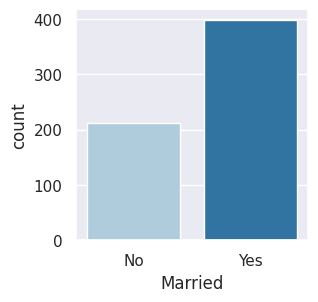

Percentage of married: 64.82%
Percentage of Not married applicant: 34.69%
Missing values percentage: 0.49%


In [ ]:
plt.figure(figsize=(3,3))
sns.countplot(x="Married", data=df, palette="Paired")
plt.show()


countMarried = len(df[df.Married == 'Yes'])
countNotMarried = len(df[df.Married == 'No'])
countNull = len(df[df.Married.isnull()])

print("Percentage of married: {:.2f}%".format((countMarried / (len(df.Married))*100)))
print("Percentage of Not married applicant: {:.2f}%".format((countNotMarried / (len(df.Married))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Married))*100)))

👉 The number of applicants that has been married is higher compared to applicants that hasn't married. It also can be seen there are small number of missing values in this column.

**Education**

In [ ]:
df.Education.value_counts(dropna=False)

,count
Education,
Graduate,480
Not Graduate,134


<ipython-input-181-d877f09d3442>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Education", data=df, palette="rocket")


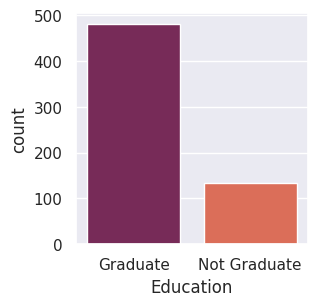

Percentage of graduate applicant: 78.18%
Percentage of Not graduate applicant: 21.82%
Missing values percentage: 0.00%


In [ ]:
plt.figure(figsize=(3,3))
sns.countplot(x="Education", data=df, palette="rocket")
plt.show()


countGraduate = len(df[df.Education == 'Graduate'])
countNotGraduate = len(df[df.Education == 'Not Graduate'])
countNull = len(df[df.Education.isnull()])

print("Percentage of graduate applicant: {:.2f}%".format((countGraduate / (len(df.Education))*100)))
print("Percentage of Not graduate applicant: {:.2f}%".format((countNotGraduate / (len(df.Education))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Education))*100)))

👉 The number of applicants that has been graduated is higher compared to applicants that hasn't graduated.

**Self Employed**

In [ ]:
df.Self_Employed.value_counts(dropna=False)

,count
Self_Employed,
No,500
Yes,82
NaN,32


<ipython-input-183-500fdd647228>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Self_Employed", data=df, palette="crest")


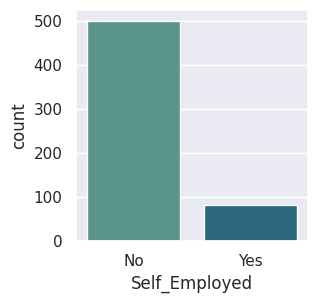

Percentage of Not self employed: 81.43%
Percentage of self employed: 13.36%
Missing values percentage: 5.21%


In [ ]:
plt.figure(figsize=(3,3))
sns.countplot(x="Self_Employed", data=df, palette="crest")
plt.show()

countNo = len(df[df.Self_Employed == 'No'])
countYes = len(df[df.Self_Employed == 'Yes'])
countNull = len(df[df.Self_Employed.isnull()])

print("Percentage of Not self employed: {:.2f}%".format((countNo / (len(df.Self_Employed))*100)))
print("Percentage of self employed: {:.2f}%".format((countYes / (len(df.Self_Employed))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Self_Employed))*100)))

**Credit History**

In [ ]:
df.Credit_History.value_counts(dropna=False)

,count
Credit_History,
1.0,475
0.0,89
NaN,50


<ipython-input-185-185a6703428e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Credit_History", data=df, palette="viridis")


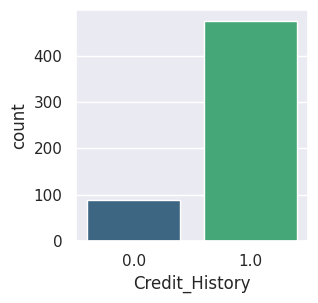

Percentage of Good credit history: 77.36%
Percentage of Bad credit history: 14.50%
Missing values percentage: 8.14%


In [ ]:
plt.figure(figsize=(3,3))
sns.countplot(x="Credit_History", data=df, palette="viridis")
plt.show()

count1 = len(df[df.Credit_History == 1])
count0 = len(df[df.Credit_History == 0])
countNull = len(df[df.Credit_History.isnull()])

print("Percentage of Good credit history: {:.2f}%".format((count1 / (len(df.Credit_History))*100)))
print("Percentage of Bad credit history: {:.2f}%".format((count0 / (len(df.Credit_History))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Credit_History))*100)))

👉 The number of applicants that have good credit history is higher compared to applicants that have bad credit history. It also can be seen, there are missing values in this column.


________________________________________________________________________________________________________________________________________________________________

 **Property Area**

In [ ]:
df.Property_Area.value_counts(dropna=False)

,count
Property_Area,
Semiurban,233
Urban,202
Rural,179


<ipython-input-187-972dbc5b3a94>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Property_Area", data=df, palette="cubehelix")


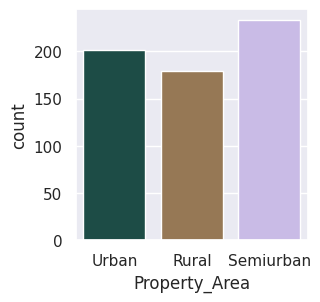

Percentage of Urban: 32.90%
Percentage of Rural: 29.15%
Percentage of Semiurban: 37.95%
Missing values percentage: 0.00%


In [ ]:
plt.figure(figsize=(3,3))
sns.countplot(x="Property_Area", data=df, palette="cubehelix")
plt.show()


countUrban = len(df[df.Property_Area == 'Urban'])
countRural = len(df[df.Property_Area == 'Rural'])
countSemiurban = len(df[df.Property_Area == 'Semiurban'])
countNull = len(df[df.Property_Area.isnull()])

print("Percentage of Urban: {:.2f}%".format((countUrban / (len(df.Property_Area))*100)))
print("Percentage of Rural: {:.2f}%".format((countRural / (len(df.Property_Area))*100)))
print("Percentage of Semiurban: {:.2f}%".format((countSemiurban / (len(df.Property_Area))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Property_Area))*100)))


👉 This column has a balanced distribution between Urban, Rural, and Semiurban property area. It also can be seen there is no missing value.

 **Loan Status**

In [ ]:
df.Loan_Status.value_counts(dropna=False)

,count
Loan_Status,
Y,422
N,192


<ipython-input-189-d32b7ab1eb19>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Loan_Status", data=df, palette="YlOrBr")


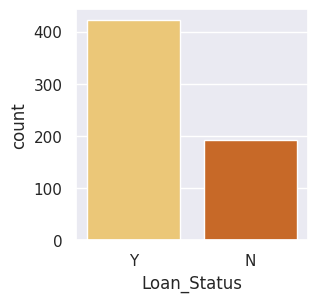

Percentage of Approved: 68.73%
Percentage of Rejected: 31.27%
Missing values percentage: 0.00%


In [ ]:
plt.figure(figsize=(3,3))
sns.countplot(x="Loan_Status", data=df, palette="YlOrBr")
plt.show()

countY = len(df[df.Loan_Status == 'Y'])
countN = len(df[df.Loan_Status == 'N'])
countNull = len(df[df.Loan_Status.isnull()])

print("Percentage of Approved: {:.2f}%".format((countY / (len(df.Loan_Status))*100)))
print("Percentage of Rejected: {:.2f}%".format((countN / (len(df.Loan_Status))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Loan_Status))*100)))

👉 The number of approved loans is higher compared to rejected loans . It also can be seen, there is no missing values in this column.

 **Loan Amount Term**

In [ ]:
df.Loan_Amount_Term.value_counts(dropna=False)

,count
Loan_Amount_Term,
360.0,512
180.0,44
480.0,15
NaN,14
300.0,13
84.0,4
240.0,4
120.0,3
60.0,2


<ipython-input-191-91deff5293f8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Loan_Amount_Term", data=df, palette="rocket")


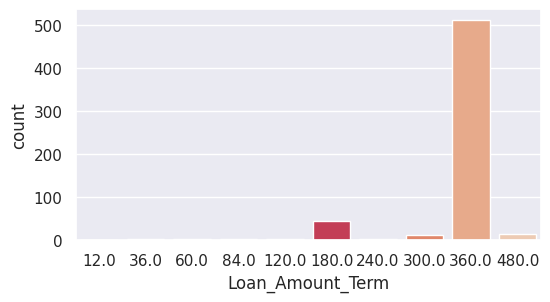

In [ ]:
plt.figure(figsize=(6,3))
sns.countplot(x="Loan_Amount_Term", data=df, palette="rocket")
plt.show()

In [ ]:
value_counts = df['Loan_Amount_Term'].value_counts(dropna=False)


percentage = (value_counts / len(df)) * 100


sorted_percentage = percentage.sort_index()


for term, pct in sorted_percentage.items():
    if pd.isna(term):
        print(f"Missing values percentage: {pct:.2f}%")
    else:
        print(f"Percentage of {int(term)}: {pct:.2f}%")

Percentage of 12: 0.16%
Percentage of 36: 0.33%
Percentage of 60: 0.33%
Percentage of 84: 0.65%
Percentage of 120: 0.49%
Percentage of 180: 7.17%
Percentage of 240: 0.65%
Percentage of 300: 2.12%
Percentage of 360: 83.39%
Percentage of 480: 2.44%
Missing values percentage: 2.28%


**Numerical Variable** 🔢

 Describe Numerical Variable 🔎
👉 This section will show mean, count, std, min, max and others using describe function.

In [ ]:
df[['ApplicantIncome','CoapplicantIncome','LoanAmount']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


** Distribution of Numerical Variable** 📈

**Histogram Distribution** 📉

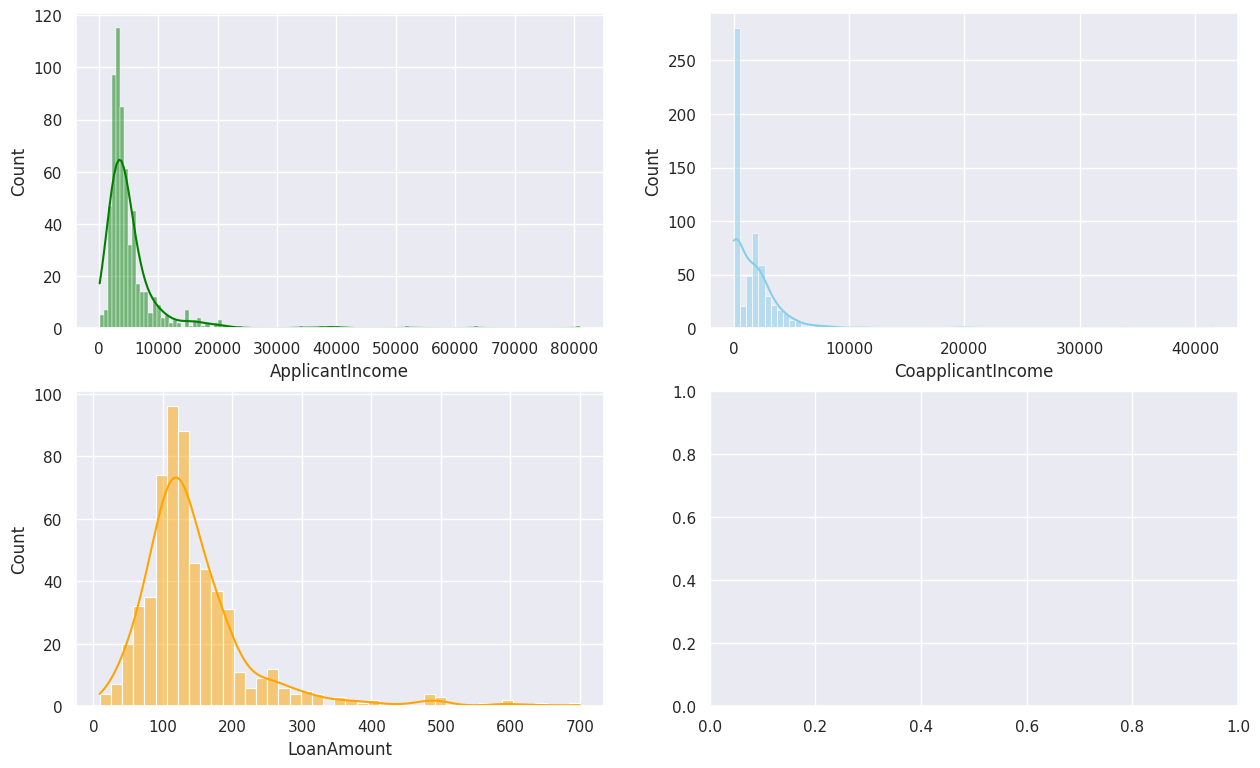

In [ ]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(15, 9))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

# Violin Plot

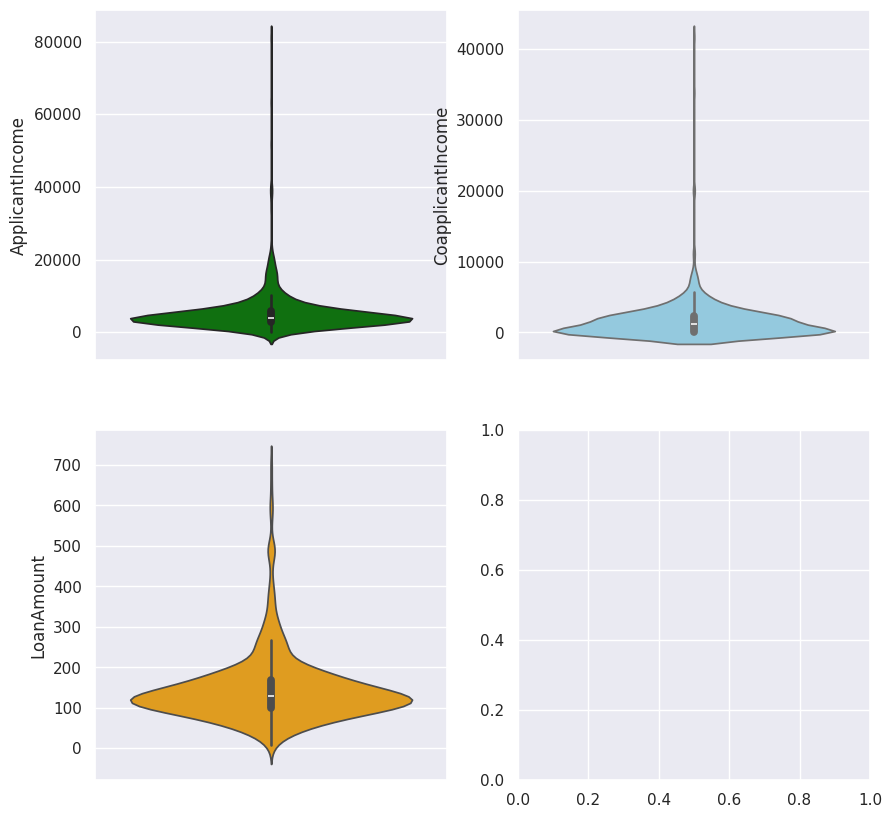

In [ ]:
sns.set(style="darkgrid")
fig, axs1 = plt.subplots(2, 2, figsize=(10, 10))

sns.violinplot(data=df, y="ApplicantIncome", ax=axs1[0, 0], color='green')
sns.violinplot(data=df, y="CoapplicantIncome", ax=axs1[0, 1], color='skyblue')
sns.violinplot(data=df, y="LoanAmount", ax=axs1[1, 0], color='orange');

The distribution of Applicant income, Co Applicant Income, and Loan Amount are positively skewed and it has outliers (can be seen from both histogram and violin plot).
The distribution of Loan Amount Term is negativly skewed and it has outliers.

 **Other Exploration 💹**

👉 This section will show additional exploration from each variables. The additional exploration are:

Bivariate analysis (categorical w/ categorical, categroical w/ numerical, and numerical w/ numerical)
Heatmap

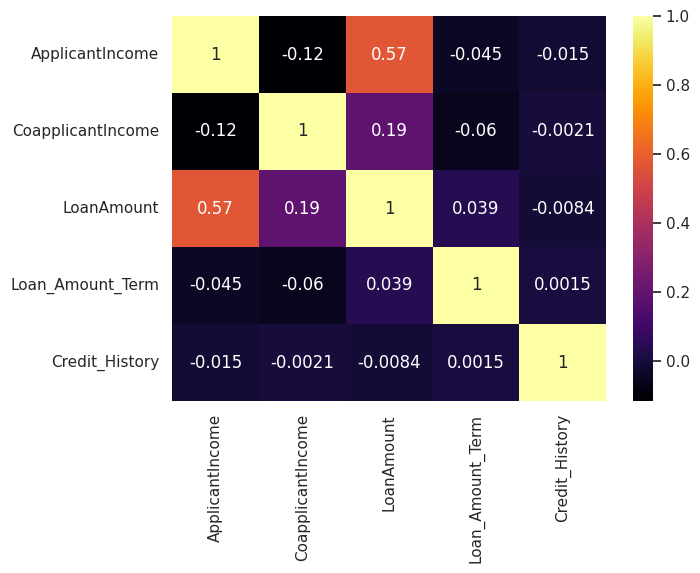

In [ ]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])


plt.figure(figsize=(7, 5))
sns.heatmap(numeric_df.corr(), annot=True, cmap='inferno')
plt.show()

👉 There is positive correlation between Loan Amount and Applicant Income

# Categorical 📊 - Categorical 📊

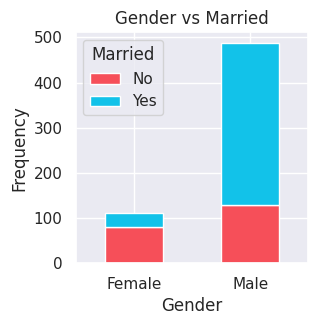

In [ ]:
pd.crosstab(df.Gender,df.Married).plot(kind="bar", stacked=True, figsize=(3,3), color=['#f64f59','#12c2e9'])
plt.title('Gender vs Married')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

👉 Most male applicants are already married compared to female applicants. Also, the number of not married male applicants are higher compare to female applicants that had not married.

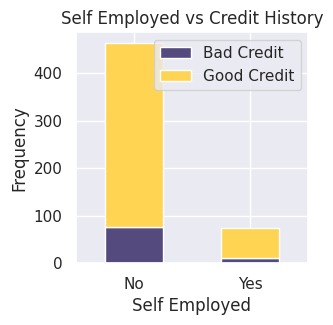

In [ ]:
pd.crosstab(df.Self_Employed,df.Credit_History).plot(kind="bar", stacked=True, figsize=(3,3), color=['#544a7d','#ffd452'])
plt.title('Self Employed vs Credit History')
plt.xlabel('Self Employed')
plt.ylabel('Frequency')
plt.legend(["Bad Credit", "Good Credit"])
plt.xticks(rotation=0)
plt.show()

👉 Most not self employed applicants have good credit compared to self employed applicants.

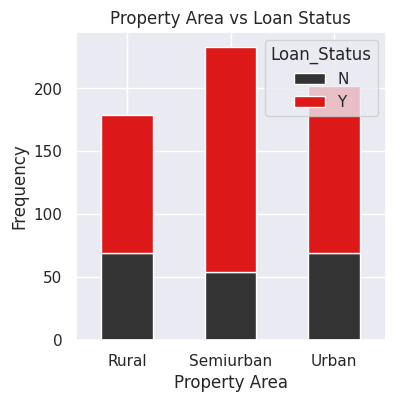

In [ ]:
pd.crosstab(df.Property_Area,df.Loan_Status).plot(kind="bar", stacked=True, figsize=(4,4), color=['#333333','#dd1818'])
plt.title('Property Area vs Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

👉 Most of loan that got accepted has property in Semiurban compared to Urban and Rural.

# Categorical 📊- Numerical 📈

<ipython-input-200-0a4d7fb48f1f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=df, palette="mako");


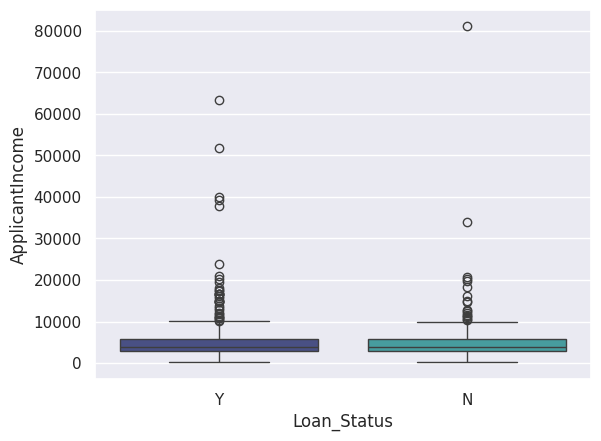

In [ ]:
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=df, palette="mako");

👉 It can be seen that there are lots of outliers in Applicant Income, and the distribution also positively skewed

<ipython-input-201-e41ee8c4d05d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="CoapplicantIncome", y="Loan_Status", data=df, palette="rocket");


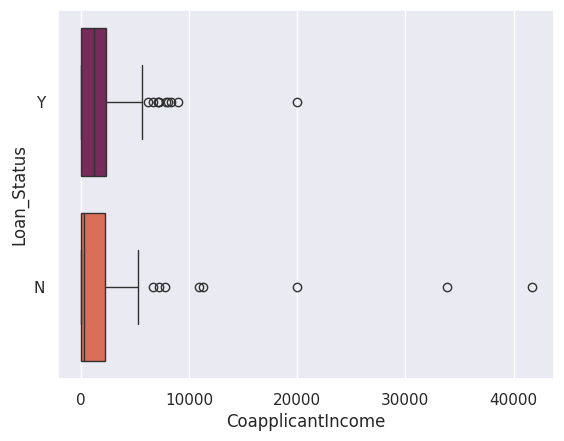

In [ ]:
sns.boxplot(x="CoapplicantIncome", y="Loan_Status", data=df, palette="rocket");

👉 It's clear that Co Applicant Income has a number of outliers, and the distribution is also positively skewed.

<ipython-input-202-7caa0fac4fb6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Loan_Status", y="LoanAmount", data=df, palette="YlOrBr");


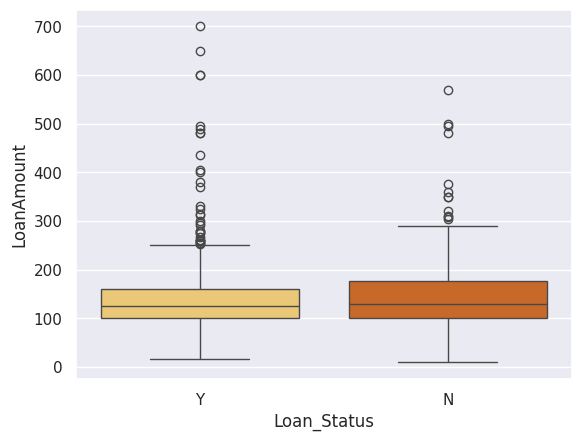

In [ ]:
sns.boxplot(x="Loan_Status", y="LoanAmount", data=df, palette="YlOrBr");

👉 As can be seen, Co Applicant Income has a high number of outliers, and the distribution is also positively skewed.

# Numerical 📈 - Numerical 📈

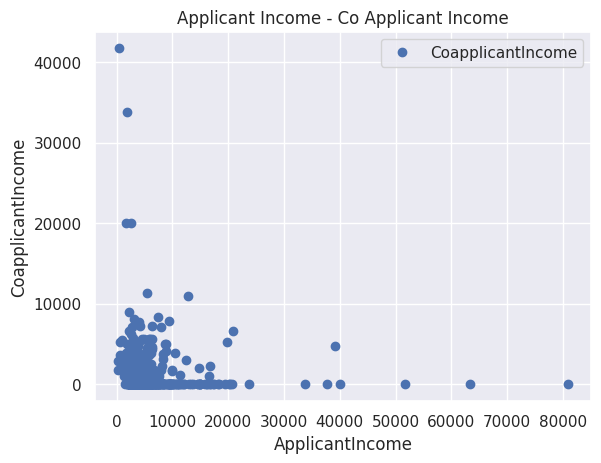

Pearson correlation: -0.11660458122889966
T Test and P value: 
 TtestResult(statistic=np.float64(13.835753259915665), pvalue=np.float64(1.460983948423972e-40), df=np.float64(1226.0))


In [ ]:

df.plot(x='ApplicantIncome', y='CoapplicantIncome', style='o')
plt.title('Applicant Income - Co Applicant Income')
plt.xlabel('ApplicantIncome')
plt.ylabel('CoapplicantIncome')
plt.show()
print('Pearson correlation:', df['ApplicantIncome'].corr(df['CoapplicantIncome']))
print('T Test and P value: \n', stats.ttest_ind(df['ApplicantIncome'], df['CoapplicantIncome']))

There is negative correlation between Applicant income and Co Applicant Income.
The correlation coefficient is significant at the 95 per cent confidence interval, as it has a p-value of 1.46

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


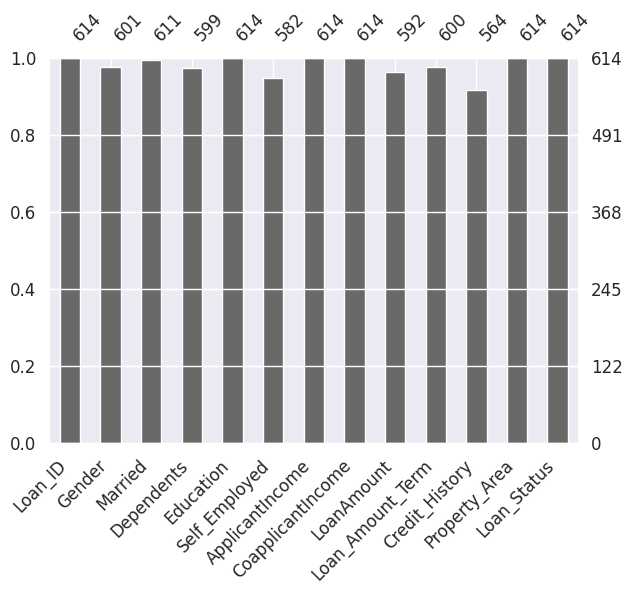

In [ ]:
plt.figure(figsize = (15, 5))
axz = plt.subplot(1,2,2)
mso.bar(df, ax = axz, fontsize = 12);

👉 Previously, the null values has been explored for Categorical Variables. In this section, the null values has been explored for all variables in the dataset.

# Data Preprocessing ⚙

 **Drop Unecessary Variables** 🔻

👉 Unecessary variables will be dropped in this section.

In [ ]:
df = df.drop(['Loan_ID'], axis = 1)

**Data Imputation 📝**

👉 Imputation is a technique for substituting an estimated value for missing values in a dataset. In this section, the imputation will be performed for variables that have missing values.

**Categorical Variables 📊**

👉 In this section, the imputation for categorical variables will be performed using mode.

In [ ]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

<ipython-input-207-a16f4fd21f84>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
<ipython-input-207-a16f4fd21f84>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

**Numerical Variables 📈**

👉 The next section is imputation for numerical variables using mean.

In [ ]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

<ipython-input-208-5bf66dd7123b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)


**One-hot Encoding 🔧**

👉 In this section, I will transform categorical variables into a form that could be provided by ML algorithms to do a better prediction.

In [ ]:
df = pd.get_dummies(df)

# Drop columns
df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate',
              'Self_Employed_No', 'Loan_Status_N'], axis = 1)

# Rename columns name
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married',
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}

df.rename(columns=new, inplace=True)

**Remove Outliers & Infinite values 🚮**

👉 Since there are outliers, the outliers will be removed.

In [ ]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])

Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1


df = df[~((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).any(axis=1)]

**Skewed Distribution Treatment 📐**
👉 In previous section, it already shown that distribution for ApplicantIncome, CoapplicantIncome, and LoanAmount is positively skewed.
👉 I will use log transformation to normalized the distribution.


In [ ]:
# Square Root Transformation

df.ApplicantIncome = np.log(df.ApplicantIncome)
df.CoapplicantIncome = np.log(df.CoapplicantIncome)
df.LoanAmount = np.log(df.LoanAmount)

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


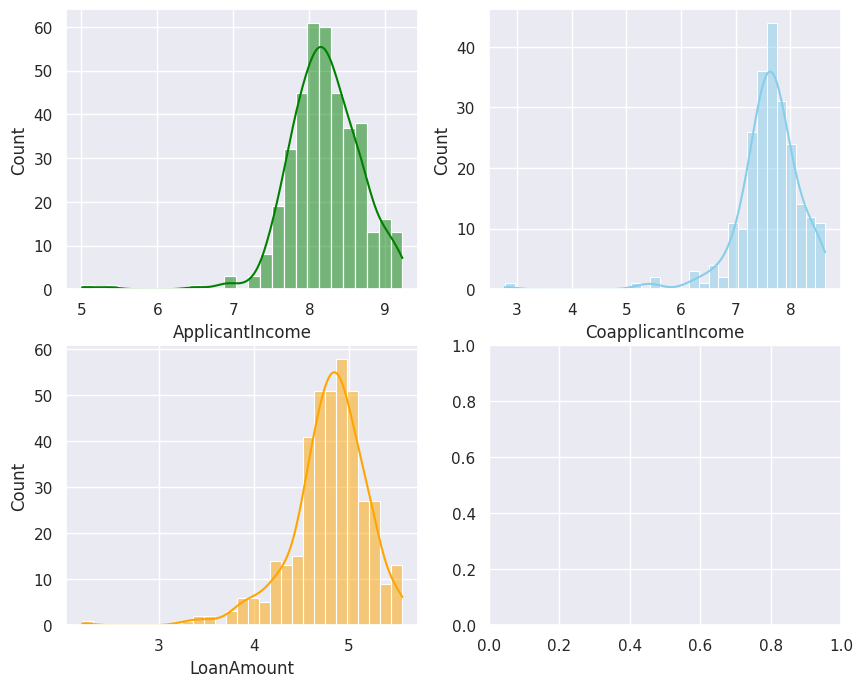

In [ ]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

👉 As can be seen, the distribution after using log transformation are much better compared to original distribution.

**Features Separating ➗**

👉 Dependent features (Loan_Status) will be seperated from independent features.

In [ ]:
X = df.drop(["Loan_Status"], axis=1)
y = df["Loan_Status"]

**SMOTE Technique 🔨**

In [ ]:
X['CoapplicantIncome'].fillna(X['CoapplicantIncome'].median(), inplace=True)

<ipython-input-214-3d42fdb3a521>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['CoapplicantIncome'].fillna(X['CoapplicantIncome'].median(), inplace=True)


In [ ]:
print(df['CoapplicantIncome'].describe())

count    396.000000
mean           -inf
std             NaN
min            -inf
25%             NaN
50%        7.199296
75%        7.707623
max        8.634976
Name: CoapplicantIncome, dtype: float64


/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4779: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


In [ ]:
df['CoapplicantIncome'].replace(-np.inf, 0, inplace=True)

# التحقق من عدم وجود قيم لا نهائية بعد التعديل
print("عدد القيم السالبة اللانهائية بعد التعديل:", np.sum(df['CoapplicantIncome'] == -np.inf))

عدد القيم السالبة اللانهائية بعد التعديل: 0


<ipython-input-223-341072f4a5e9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CoapplicantIncome'].replace(-np.inf, 0, inplace=True)


In [ ]:
print(df['CoapplicantIncome'].describe())

count    396.000000
mean       4.472532
std        3.775302
min        0.000000
25%        0.000000
50%        7.199296
75%        7.707623
max        8.634976
Name: CoapplicantIncome, dtype: float64


In [ ]:
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# تعويض القيم المفقودة (NaN) بالقيم المتوسطة (أو أي طريقة أخرى تناسبك)
X.fillna(X.median(), inplace=True)  # استخدام الوسيط لتجنب تأثير القيم المتطرفة

In [ ]:
X, y = SMOTE().fit_resample(X, y)

<ipython-input-229-464dc99333fe>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=y, data=df, palette="coolwarm")


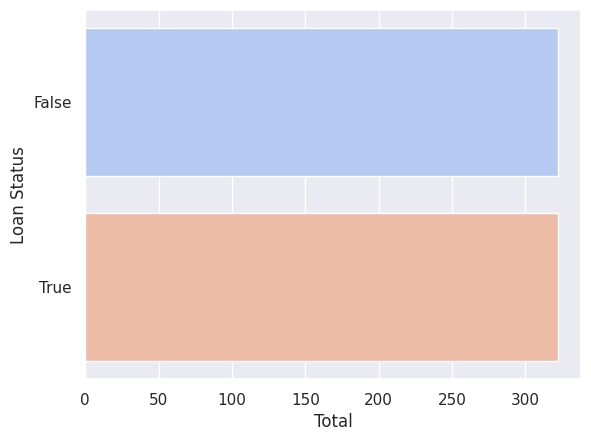

In [ ]:

sns.set_theme(style="darkgrid")
sns.countplot(y=y, data=df, palette="coolwarm")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

👉 As can be seen, the distrubtion of Loan status are now balanced.

**Data Normalization ⚖**

In [ ]:
X = MinMaxScaler().fit_transform(X)

**Splitting Data Set 🪓**

The data set will be split into 80% train and 20% test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,8.674026,0.000000,4.986426,360.0,1.0,True,False,True,False,False,False,True,False,False,False,True,True
1,8.430109,7.318540,4.852030,360.0,1.0,True,True,False,True,False,False,True,False,True,False,False,False
2,8.006368,0.000000,4.189655,360.0,1.0,True,True,True,False,False,False,True,True,False,False,True,True
3,7.856707,7.765569,4.787492,360.0,1.0,True,True,True,False,False,False,False,False,False,False,True,True
4,8.699515,0.000000,4.948760,360.0,1.0,True,False,True,False,False,False,True,False,False,False,True,True


In [ ]:
print(df['CoapplicantIncome'].value_counts())

CoapplicantIncome
0.000000    163
7.641564      5
7.418181      4
7.824046      4
7.285507      3
           ... 
6.907755      1
7.934513      1
8.366603      1
7.252054      1
5.480639      1
Name: count, Length: 205, dtype: int64


In [ ]:
df.shape

(396, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 396 entries, 0 to 612
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          396 non-null    float64
 1   CoapplicantIncome        396 non-null    float64
 2   LoanAmount               396 non-null    float64
 3   Loan_Amount_Term         396 non-null    float64
 4   Credit_History           396 non-null    float64
 5   Gender                   396 non-null    bool   
 6   Married                  396 non-null    bool   
 7   Dependents_0             396 non-null    bool   
 8   Dependents_1             396 non-null    bool   
 9   Dependents_2             396 non-null    bool   
 10  Dependents_3+            396 non-null    bool   
 11  Education                396 non-null    bool   
 12  Self_Employed            396 non-null    bool   
 13  Property_Area_Rural      396 non-null    bool   
 14  Property_Area_Semiurban  396 no

**Models 🛠**

**Logistic Regression**

In [ ]:
LRclassifier = LogisticRegression(solver='saga', max_iter=500, random_state=1)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

       False       0.61      0.72      0.66        67
        True       0.62      0.50      0.55        62

    accuracy                           0.61       129
   macro avg       0.61      0.61      0.61       129
weighted avg       0.61      0.61      0.61       129

[[48 19]
 [31 31]]
LR accuracy: 61.24%


**K-Nearest Neighbour (KNN)**

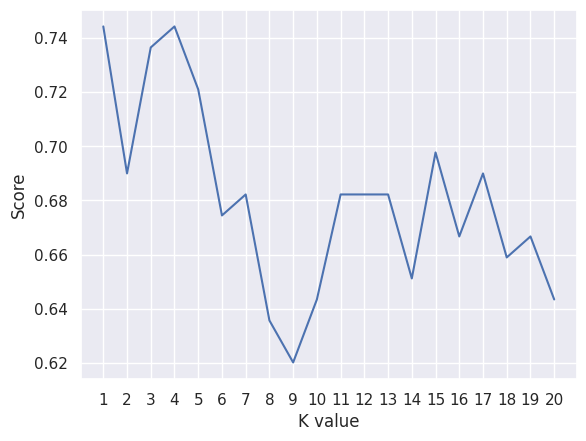

KNN best accuracy: 74.42%


In [ ]:
scoreListknn = []
for i in range(1,21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))

plt.plot(range(1,21), scoreListknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

In [ ]:
param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("أفضل المعلمات لـ KNN:", grid.best_params_)
best_knn = grid.best_estimator_

أفضل المعلمات لـ KNN: {'n_neighbors': 3, 'weights': 'distance'}


تقرير الأداء لـ KNN بعد التحسين:
              precision    recall  f1-score   support

       False       0.73      0.84      0.78        67
        True       0.79      0.66      0.72        62

    accuracy                           0.75       129
   macro avg       0.76      0.75      0.75       129
weighted avg       0.76      0.75      0.75       129

مصفوفة الالتباس:
[[56 11]
 [21 41]]
الدقة المحسنة لـ KNN: 75.19%


**Support Vector Machine (SVM)**

In [ ]:
SVCclassifier = SVC(kernel='rbf', max_iter=500)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

       False       0.65      0.76      0.70        67
        True       0.69      0.56      0.62        62

    accuracy                           0.67       129
   macro avg       0.67      0.66      0.66       129
weighted avg       0.67      0.67      0.66       129

[[51 16]
 [27 35]]
SVC accuracy: 66.67%


**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


NBclassifier = GaussianNB()


NBclassifier.fit(X_train, y_train)


y_pred = NBclassifier.predict(X_test)


print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


NBAcc1 = accuracy_score(y_test, y_pred)
print(f'Gaussian Naive Bayes accuracy: {NBAcc*100:.2f}%')

              precision    recall  f1-score   support

       False       0.57      0.78      0.65        67
        True       0.59      0.35      0.44        62

    accuracy                           0.57       129
   macro avg       0.58      0.57      0.55       129
weighted avg       0.58      0.57      0.55       129

[[52 15]
 [40 22]]
Gaussian Naive Bayes accuracy: 58.14%


**Gaussian NB**

In [ ]:
NBclassifier2 = GaussianNB()
NBclassifier2.fit(X_train, y_train)

y_pred = NBclassifier2.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc2 = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy: {:.2f}%'.format(NBAcc2*100))

              precision    recall  f1-score   support

       False       0.57      0.78      0.65        67
        True       0.59      0.35      0.44        62

    accuracy                           0.57       129
   macro avg       0.58      0.57      0.55       129
weighted avg       0.58      0.57      0.55       129

[[52 15]
 [40 22]]
Gaussian Naive Bayes accuracy: 57.36%


**Decision Tree**

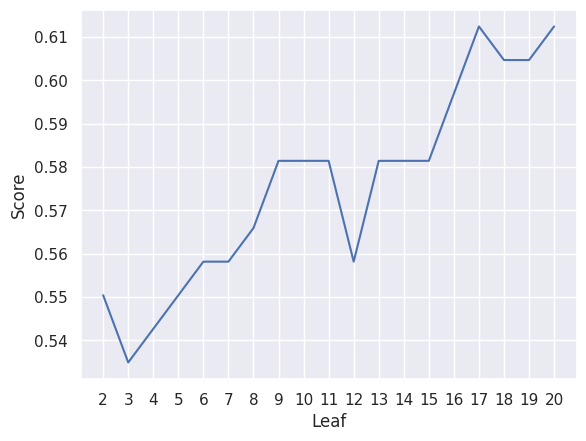

Decision Tree Accuracy: 61.24%


In [ ]:
scoreListDT = []
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))

plt.plot(range(2,21), scoreListDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(scoreListDT)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

**Random Forest**

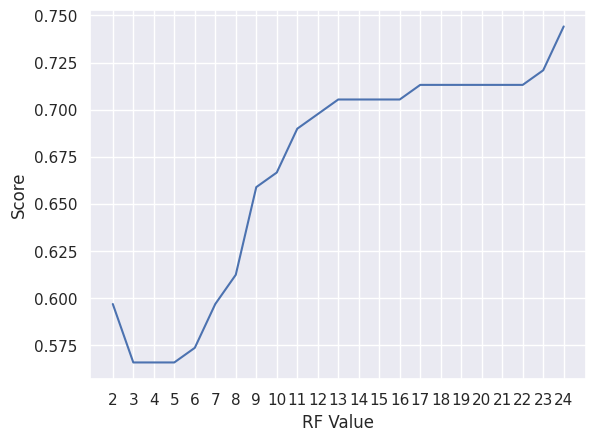

Random Forest Accuracy:  74.42%


In [ ]:
scoreListRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))

plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

In [ ]:
rf_model = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=1)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

       False       0.73      0.84      0.78        67
        True       0.79      0.66      0.72        62

    accuracy                           0.75       129
   macro avg       0.76      0.75      0.75       129
weighted avg       0.76      0.75      0.75       129



**Gradient Boosting**

In [ ]:
paramsGB={'n_estimators':[100,200,300,400,500],
      'max_depth':[1,2,3,4,5],
      'subsample':[0.5,1],
      'max_leaf_nodes':[2,5,10,20,30,40,50]}


In [ ]:
GB = RandomizedSearchCV(GradientBoostingClassifier(), paramsGB, cv=20)
GB.fit(X_train, y_train)

RandomizedSearchCV(cv=20, estimator=GradientBoostingClassifier(),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5],
                                        'max_leaf_nodes': [2, 5, 10, 20, 30, 40,
                                                           50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.5, 1]})

In [ ]:
print(GB.best_estimator_)
print(GB.best_score_)
print(GB.best_params_)
print(GB.best_index_)

GradientBoostingClassifier(max_depth=4, max_leaf_nodes=50, n_estimators=400,
                           subsample=0.5)
0.8036923076923077
{'subsample': 0.5, 'n_estimators': 400, 'max_leaf_nodes': 50, 'max_depth': 4}
5


In [ ]:
GBclassifier = GradientBoostingClassifier(subsample=0.5, n_estimators=400, max_depth=4, max_leaf_nodes=10)
GBclassifier.fit(X_train, y_train)

y_pred = GBclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
GBAcc = accuracy_score(y_pred,y_test)
print('Gradient Boosting accuracy: {:.2f}%'.format(GBAcc*100))

              precision    recall  f1-score   support

       False       0.73      0.79      0.76        67
        True       0.75      0.68      0.71        62

    accuracy                           0.74       129
   macro avg       0.74      0.73      0.73       129
weighted avg       0.74      0.74      0.74       129

[[53 14]
 [20 42]]
Gradient Boosting accuracy: 73.64%


**Model Comparison:**

In [ ]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors',
                                  'SVM', 'Categorical NB',
                                  'Gaussian NB', 'Decision Tree',
                                  'Random Forest', 'Gradient Boost'],
                        'Accuracy': [LRAcc*100, KNAcc*100, SVCAcc*100,
                                     NBAcc1*100, NBAcc2*100, DTAcc*100,
                                     RFAcc*100, GBAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
1,K Neighbors,74.418605
6,Random Forest,74.418605
7,Gradient Boost,73.643411
2,SVM,66.666667
5,Decision Tree,61.240310
0,Logistic Regression,61.240310
3,Categorical NB,57.364341
4,Gaussian NB,57.364341
